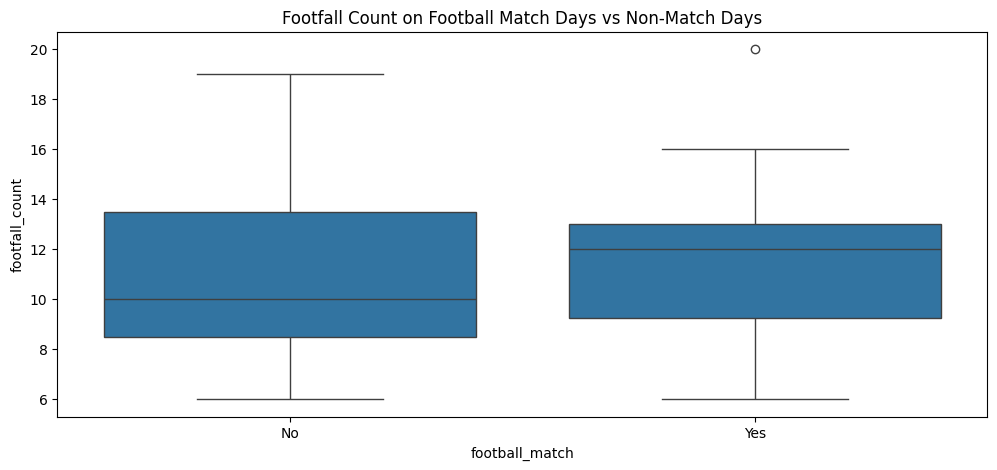

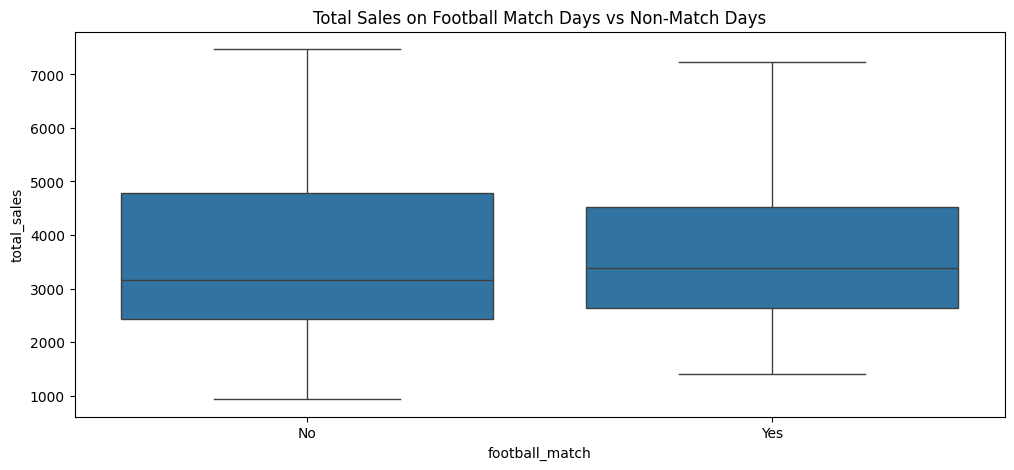

Saved augmented CSV as 'supermarket_sales_with_matchdays.csv'


In [5]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns



# Load your existing CSV
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()
# Convert date column to datetime (adjust column name if different)
df['Date'] = pd.to_datetime(df['Date'])


# Simulate football matchdays
unique_dates = df['Date'].sort_values().unique()
num_matchdays = 30  # or any number you like
football_days = random.sample(list(unique_dates), num_matchdays)

df['football_match'] = df['Date'].apply(lambda x: 'Yes' if x in football_days else 'No')

# Aggregate data to daily level
daily = df.groupby(['Date', 'football_match']).agg(
    footfall_count=('Invoice ID', 'nunique'),  # invoices as footfall proxy
    total_sales=('Sales', 'sum')
).reset_index()

# Visualizations
plt.figure(figsize=(12,5))
sns.boxplot(x='football_match', y='footfall_count', data=daily)
plt.title('Footfall Count on Football Match Days vs Non-Match Days')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='football_match', y='total_sales', data=daily)
plt.title('Total Sales on Football Match Days vs Non-Match Days')
plt.show()

# Save updated CSV
df.to_csv('supermarket_sales_with_matchdays.csv', index=False)
print("Saved augmented CSV as 'supermarket_sales_with_matchdays.csv'")


In [6]:
from scipy.stats import ttest_ind

# Split data into two groups
match_days = daily[daily['football_match'] == 'Yes']
non_match_days = daily[daily['football_match'] == 'No']

# Test footfall difference
t_stat_footfall, p_val_footfall = ttest_ind(match_days['footfall_count'], non_match_days['footfall_count'], equal_var=False)
print(f"Footfall t-test p-value: {p_val_footfall:.4f}")

# Test total sales difference
t_stat_sales, p_val_sales = ttest_ind(match_days['total_sales'], non_match_days['total_sales'], equal_var=False)
print(f"Total Sales t-test p-value: {p_val_sales:.4f}")


Footfall t-test p-value: 0.6828
Total Sales t-test p-value: 0.9237


Average Sales per Product Line:
Product line    Electronic accessories  Fashion accessories  \
football_match                                                
No                           729.04062           676.258500   
Yes                          715.42002           756.043875   

Product line    Food and beverages  Health and beauty  Home and lifestyle  \
football_match                                                              
No                      794.334450          638.11125          731.713500   
Yes                     631.850827          742.57596          692.613519   

Product line    Sports and travel  
football_match                     
No                      753.57933  
Yes                     622.99500  


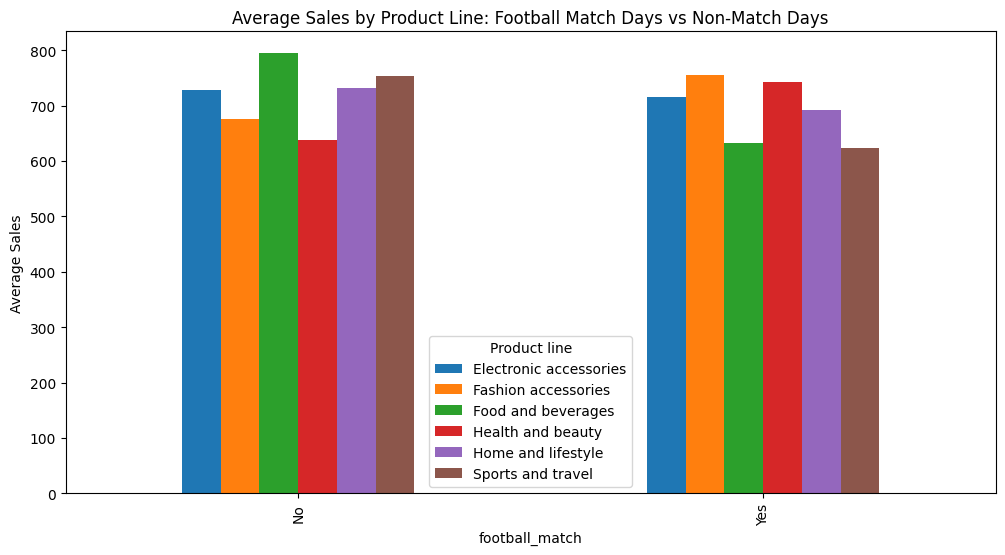


T-test results per Product Line:
Health and beauty: p-value = 0.4942
Electronic accessories: p-value = 0.9252
Home and lifestyle: p-value = 0.7447
Sports and travel: p-value = 0.3181
Food and beverages: p-value = 0.1815
Fashion accessories: p-value = 0.5458


In [9]:
from scipy.stats import ttest_ind

# Assuming df is loaded and 'football_match' column exists

# Aggregate sales and quantity by Date, Match day and Product line
daily_product = df.groupby(['Date', 'football_match', 'Product line']).agg(
    total_sales=('Sales', 'sum'),
    quantity_sold=('Quantity', 'sum')
).reset_index()

# Pivot table to compare average sales on match vs non-match days per product line
avg_sales = daily_product.groupby(['football_match', 'Product line'])['total_sales'].mean().unstack()

print("Average Sales per Product Line:")
print(avg_sales)

# Visualize average sales by product line
avg_sales.plot(kind='bar', figsize=(12,6))
plt.title("Average Sales by Product Line: Football Match Days vs Non-Match Days")
plt.ylabel("Average Sales")
plt.show()

# Optional: T-test per product line to check significance
product_lines = df['Product line'].unique()

print("\nT-test results per Product Line:")
for product in product_lines:
    match_sales = daily_product[(daily_product['football_match']=='Yes') & (daily_product['Product line']==product)]['total_sales']
    non_match_sales = daily_product[(daily_product['football_match']=='No') & (daily_product['Product line']==product)]['total_sales']

    if len(match_sales) > 1 and len(non_match_sales) > 1:
        t_stat, p_val = ttest_ind(match_sales, non_match_sales, equal_var=False)
        print(f"{product}: p-value = {p_val:.4f}")
    else:
        print(f"{product}: Not enough data for test")


        City football_match    avg_sales  avg_footfall
0   Mandalay             No  1195.827187      3.857143
1   Mandalay            Yes  1307.711650      3.866667
2  Naypyitaw             No  1247.853672      3.586207
3  Naypyitaw            Yes  1273.106450      4.000000
4     Yangon             No  1256.370381      3.949153
5     Yangon            Yes  1069.150600      3.566667


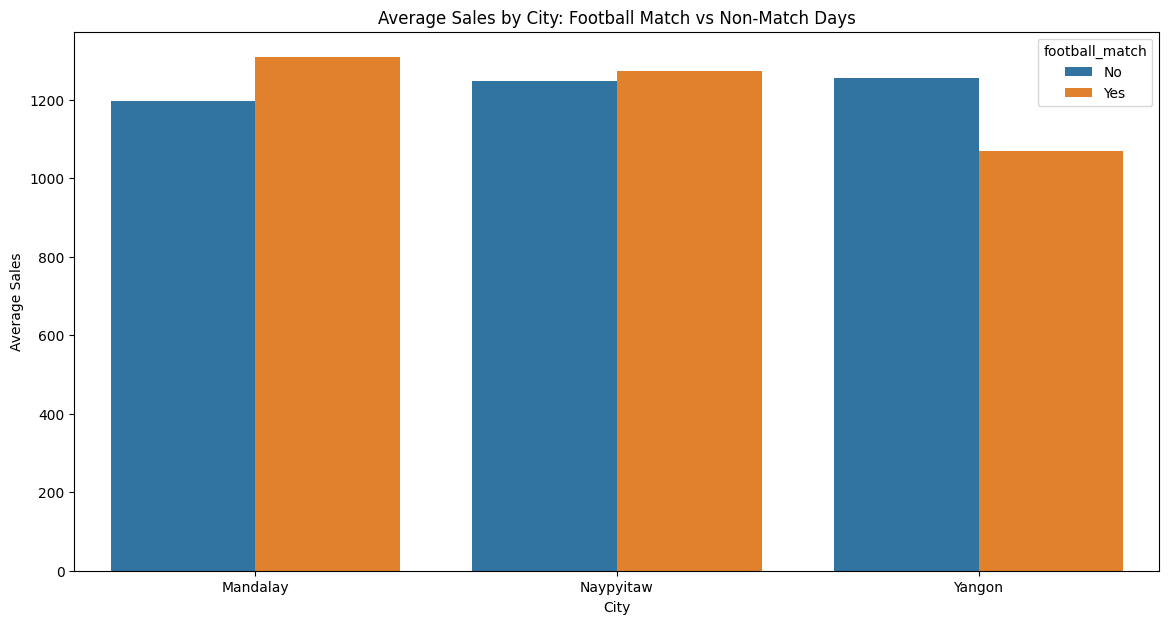

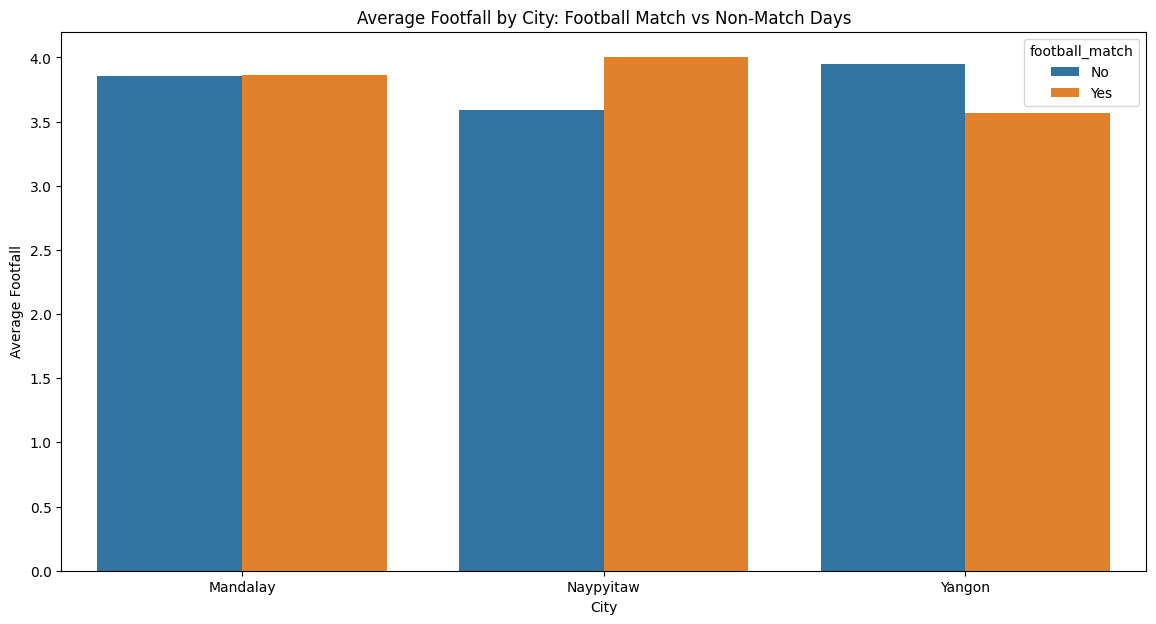

In [10]:
# Aggregate by City (or Branch), football_match, and Date
daily_city = df.groupby(['Date', 'football_match', 'City']).agg(
    total_sales=('Sales', 'sum'),
    footfall_count=('Invoice ID', 'nunique')  # invoices as footfall proxy
).reset_index()

# Calculate average sales and footfall per city and football match status
avg_city = daily_city.groupby(['City', 'football_match']).agg(
    avg_sales=('total_sales', 'mean'),
    avg_footfall=('footfall_count', 'mean')
).reset_index()

print(avg_city)



plt.figure(figsize=(14,7))
sns.barplot(data=avg_city, x='City', y='avg_sales', hue='football_match')
plt.title('Average Sales by City: Football Match vs Non-Match Days')
plt.ylabel('Average Sales')
plt.show()

# Visualize average footfall city-wise
plt.figure(figsize=(14,7))
sns.barplot(data=avg_city, x='City', y='avg_footfall', hue='football_match')
plt.title('Average Footfall by City: Football Match vs Non-Match Days')
plt.ylabel('Average Footfall')
plt.show()
